In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import mnist
from keras import regularizers

In [2]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
import pandas as pd

data = pd.read_csv(r"C:\Users\yasha\Desktop\Ashish\sem 7\DL\Datasets\mnist_784_csv.csv")

In [3]:
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [4]:
x = data.iloc[:,0:784]
y = data['class']

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [9]:
x_train.shape

(49000, 784)

In [10]:
x_test.shape

(21000, 784)

In [11]:
x_train = x_train.astype('float32')/255

In [12]:
x_test = x_test.astype('float32')/255

In [13]:
X_train = x_train.to_numpy().reshape(x_train.shape[0],28*28)
X_test = x_test.to_numpy().reshape(x_test.shape[0],28*28)

In [14]:
X_train.shape

(49000, 784)

In [15]:
X_test.shape

(21000, 784)

In [16]:
input_layer = Input(shape = (28*28,))

In [17]:
encode = Dense(500, activation = 'relu', activity_regularizer = regularizers.l1(10e-5))(input_layer)
encode = Dense(300, activation = 'relu')(encode)

In [18]:
decode = Dense(300, activation = 'sigmoid')(encode)
decode = Dense(500, activation = 'sigmoid')(decode)

In [19]:
output_layer = Dense(784, activation = 'sigmoid')(decode)

In [20]:
autoencoder = Model(input_layer, output_layer)

In [21]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [22]:
autoencoder.fit(X_train, X_train, epochs=10, batch_size = 100, shuffle=True)

Epoch 1/10
490/490 [==============================] - 4s 8ms/step - loss: 0.2537
Epoch 2/10
490/490 [==============================] - 4s 8ms/step - loss: 0.1828
Epoch 3/10
490/490 [==============================] - 4s 8ms/step - loss: 0.1436
Epoch 4/10
490/490 [==============================] - 4s 8ms/step - loss: 0.1255
Epoch 5/10
490/490 [==============================] - 4s 8ms/step - loss: 0.1149
Epoch 6/10
490/490 [==============================] - 4s 8ms/step - loss: 0.1079
Epoch 7/10
490/490 [==============================] - 4s 8ms/step - loss: 0.1029
Epoch 8/10
490/490 [==============================] - 5s 9ms/step - loss: 0.0990
Epoch 9/10
490/490 [==============================] - 5s 11ms/step - loss: 0.0957
Epoch 10/10
490/490 [==============================] - 5s 10ms/step - loss: 0.0932


In [23]:
x_test = x_test.to_numpy().reshape(x_test.shape[0],28,28)

In [24]:
pred = autoencoder.predict(X_test)

657/657 [==============================] - 2s 3ms/step


In [25]:
pred.shape

(21000, 784)

In [26]:
pred = pred.reshape(pred.shape[0], 28,28)

In [27]:
import random 

n = random.randint(0,1000)

input


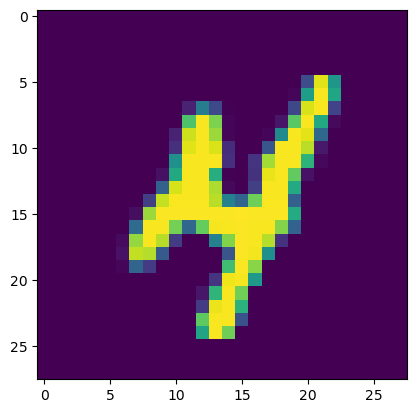

In [28]:
import matplotlib.pyplot as plt

print("input")
plt.imshow(x_test[n])

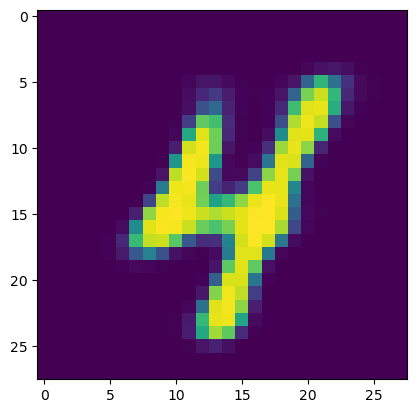

In [29]:
plt.imshow(pred[n])